In [6]:
# Importing the libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading the data
df = load_dataset('lukebarousse/data_jobs')['train'].to_pandas()

# cleaning data
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Box Plots
 - Compact visualization of key summary statistics (minimum, first quartile, median, third quartile, and maximum).
 - Easy to compare distributions across multiple groups.
 - Identifies skewness and outliers in the data.

`boxplot()`: plot a box plot

Common Parameters:
- `column` - column(s) to plot
- `by` - if specified, data will be grouped and a box plot for each group will be plotted
- `vert` - if False, plots horizontal boxplots
- Syntax: `boxplot(column=['column1', 'column2', ...], by=None, vert=False)`

In [9]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country']=='United States')]

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

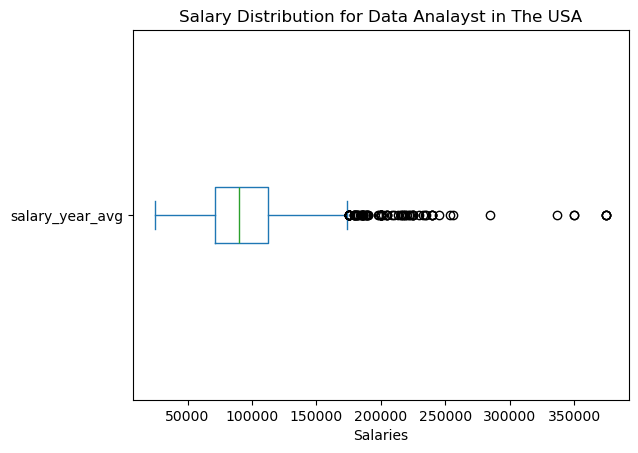

In [10]:
df_DA_US['salary_year_avg'].plot(kind='box',vert= False)
# Alternatively, using matplotlib
# plt.boxplot(df_DA_US['salary_year_avg'])

plt.title('Salary Distribution for Data Analayst in The USA')
plt.xlabel('Salaries')
plt.show()

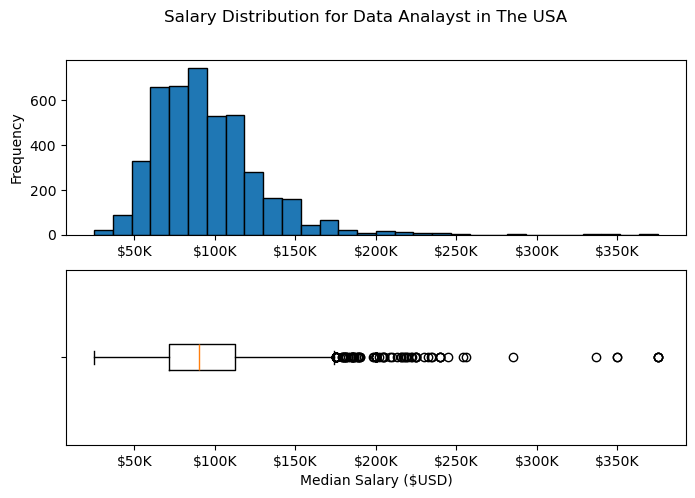

In [33]:
# plot histogram and boxplot for df_DA_US['salary_year_avg'] on same figure

fig, ax = plt.subplots(2,1, figsize=(8,5))

ax[0].hist(df_DA_US['salary_year_avg'], bins=30, edgecolor='black') # Basic visual
# adjusting the axises
ax[0].set_ylabel('Frequency')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))


ax[1].boxplot(df_DA_US['salary_year_avg'],vert=False)   # Basic visual
# adjusting the axises
ax[1].set_yticklabels('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

fig.suptitle('Salary Distribution for Data Analayst in The USA')
plt.show()


to make a line in the graph use `plt.axvline(column location in the graph , color= '', linestyle= '')`

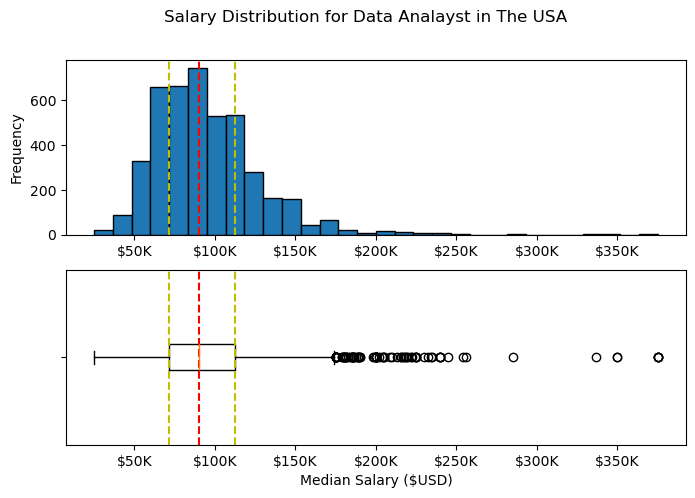

In [40]:
# plot histogram and boxplot for df_DA_US['salary_year_avg'] on same figure

fig, ax = plt.subplots(2,1, figsize=(8,5))

ax[0].hist(df_DA_US['salary_year_avg'], bins=30, edgecolor='black') # Basic visual
# adjusting the axises
ax[0].set_ylabel('Frequency')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

# making lines (easier than it looks)
ax[0].axvline(df_DA_US['salary_year_avg'].median(), color= 'r', linestyle='--' )
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color= 'y', linestyle='--' )
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color= 'y', linestyle='--' )

ax[1].boxplot(df_DA_US['salary_year_avg'],vert=False)   # Basic visual
# adjusting the axises
ax[1].set_yticklabels('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

# making lines (easier than it looks)
ax[1].axvline(df_DA_US['salary_year_avg'].median(), color= 'r', linestyle='--' )
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color= 'y', linestyle='--' )
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color= 'y', linestyle='--' )

fig.suptitle('Salary Distribution for Data Analayst in The USA')
plt.show()

creating 3 boxplots for Data Analyst, Data Engineer, and Data Scientist job salaries in the United States.

In [ ]:
job_titles = ['Data Scientist','Data Engineer','Data Analyst']

In [8]:
job_titles = ['Data Scientist','Data Engineer','Data Analyst']


df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].dropna(subset='salary_year_avg')

TypeError: 'numpy.ndarray' object is not callable

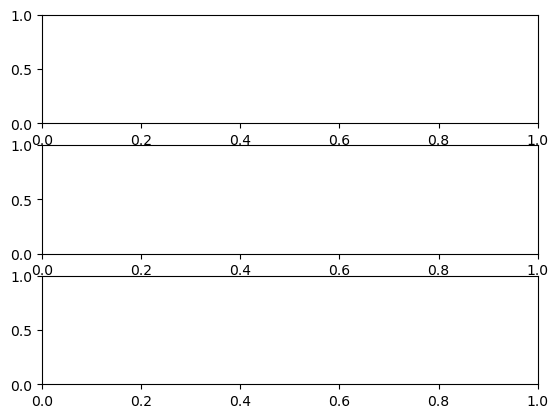

In [17]:
fig, ax = plt.subplots(3,1)

#for job_title in job_titles:
ax[0].boxplot(df_US['salary_year_avg'].values('job_title'), vert=False)
#df_US['salary_year_avg'].plot(kind= 'box', vert= False, ax= ax[0])

ax[1].boxplot(df_US['salary_year_avg'], vert=False)

ax[2].boxplot(df_US['salary_year_avg'], vert=False)

Explaining


I wanted the data frame filtered for the 3 specific jobs, so i made a list of the 3 jobs and looped throw using list comprehension; by doing that I created three data frames filtered based on the job, so I had to put it in a list to be able to plot it easily.



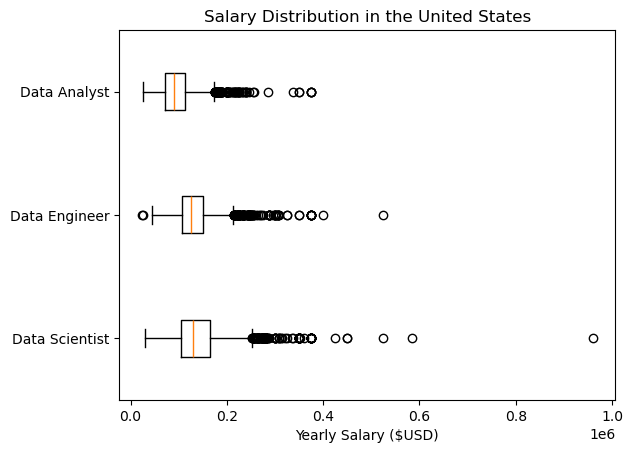

In [20]:
#fig, ax = plt.subplots(3,1)


#plt.boxplot(df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles, vert=False)
#df_US['salary_year_avg'].plot(kind= 'box', vert= False, ax= ax[0])
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, tick_labels= job_titles, vert= False) # for each job_title in job_titles there will be a tick label

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.show()

Customization

- Formatting y-axis to display in thousands.
- Adding a scale to the y-axis.
- Limiting the y-axis to 600,000 (removes the one outlier for the one Data Scientist role).

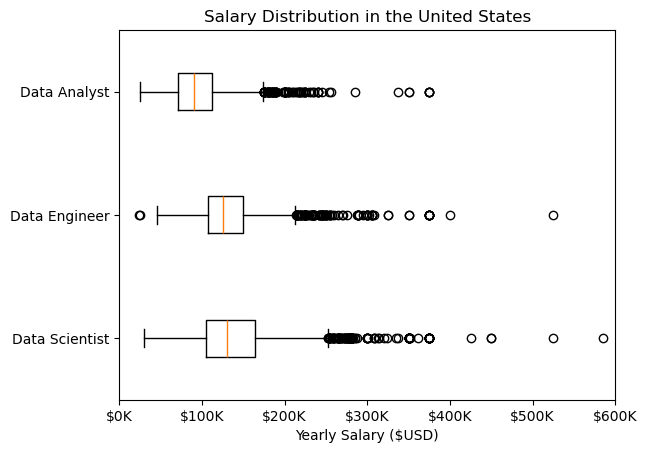

In [21]:
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, tick_labels= job_titles, vert= False) # for each job_title in job_titles there will be a tick label
plt.xlim(0,600000)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.show()

I could have created 3 data frame one for each job and using suplots created three graphs.

In [30]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country']=='United States')].dropna(subset='salary_year_avg').copy()
df_EN_US = df[(df['job_title_short'] == 'Data Engineer') & (df['job_country']=='United States')].dropna(subset='salary_year_avg').copy()
df_SC_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country']=='United States')].dropna(subset='salary_year_avg').copy()


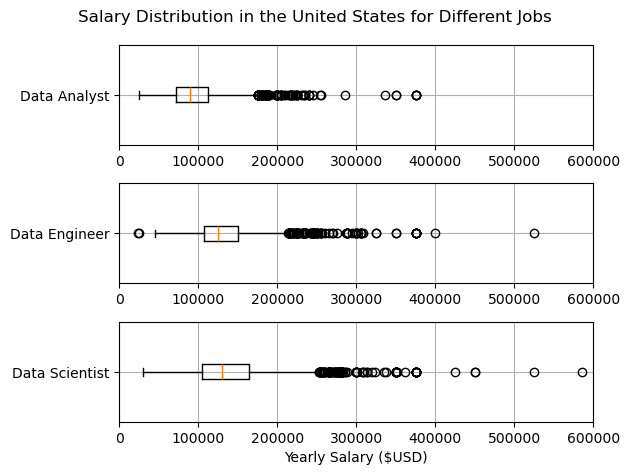

In [42]:
fig,ax= plt.subplots(3,1)

ax[0].boxplot(df_DA_US['salary_year_avg'], vert= False)
ax[0].set_xlim(0,600000)
ax[0].set_yticklabels(['Data Analyst'])
ax[0].grid(True)

ax[1].boxplot(df_EN_US['salary_year_avg'], vert= False)
ax[1].set_xlim(0,600000)
ax[1].set_yticklabels(['Data Engineer'])
ax[1].grid(True)

ax[2].boxplot(df_SC_US['salary_year_avg'], vert= False)
ax[2].set_xlim(0,600000)
ax[2].set_yticklabels(['Data Scientist'])
ax[2].grid(True)

fig.suptitle('Salary Distribution in the United States for Different Jobs')
plt.xlabel('Yearly Salary ($USD)')
plt.tight_layout()
plt.show()

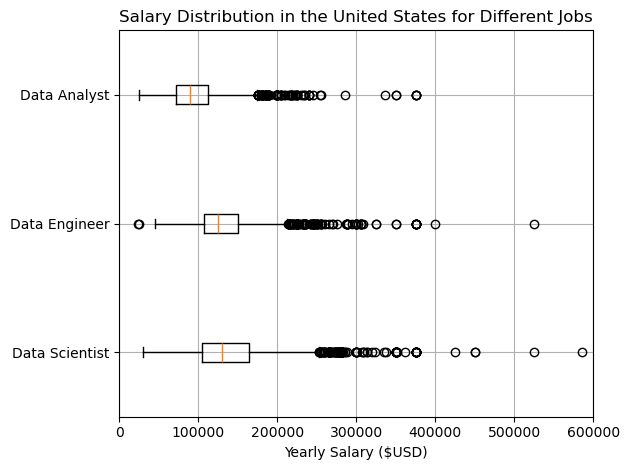

In [50]:
plt.boxplot(df_DA_US['salary_year_avg'], vert= False, positions=[3])
# plt.yticks(['Data Analyst'])

plt.boxplot(df_EN_US['salary_year_avg'], vert= False, positions=[2])
# plt.yticks(['Data Engineer'])


plt.boxplot(df_SC_US['salary_year_avg'], vert= False, positions=[1])
# plt.yticks(['Data Scientist'])

plt.yticks([3, 2, 1], ['Data Analyst', 'Data Engineer', 'Data Scientist'])


plt.xlim(0,600000)
plt.grid(True)
plt.title('Salary Distribution in the United States for Different Jobs')
plt.xlabel('Yearly Salary ($USD)')
plt.tight_layout()
plt.show()